In [1]:
import matplotlib
%matplotlib nbagg
from matplotlib import pyplot

/home/amfall/.miniconda/envs/FFP17/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
from statiskit import (linalg,
                       core,
                       pgm)

ImportError: /home/amfall/.miniconda/envs/FFP17/lib/python2.7/site-packages/statiskit/pgm/__pgm.so: undefined symbol: _ZTIN9statiskit27UndirectedGraphDistributionE

In [19]:
import math
import os

In [3]:
%reload_ext rpy2.ipython

In [4]:
if not 'K' in os.environ:
    os.environ['K'] = str(10)
K = int(os.environ.get('K'))
simulation = !jupyter nbconvert --ExecutePreprocessor.timeout=3600 --to notebook --execute sampling.ipynb --output sampling.ipynb
graph = pgm.read_gml(os.path.join('results', 'graph.gml'))
data = core.read_csv(os.path.join('results', 'data.csv'))
data

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,$0.45$,$-0.37$,$-0.34$,$1.46$,$0.90$,$-0.22$,$1.61$,$0.59$,$-1.39$,$-0.32$
1,$0.10$,$-0.50$,$-0.59$,$-0.28$,$1.52$,$-1.74$,$2.19$,$-0.00$,$0.79$,$0.05$
2,$-0.80$,$-0.42$,$0.91$,$0.72$,$1.31$,$-1.42$,$2.92$,$0.84$,$0.88$,$-0.36$
3,$-0.61$,$-0.44$,$0.39$,$-0.89$,$1.10$,$-0.56$,$-1.20$,$0.50$,$-0.63$,$0.08$
4,$0.55$,$-0.05$,$0.53$,$0.94$,$2.04$,$-1.39$,$-0.42$,$-0.52$,$-2.06$,$0.32$
5,$0.73$,$-0.29$,$1.45$,$0.15$,$0.20$,$1.94$,$-2.66$,$-0.05$,$1.74$,$0.34$
6,$-0.64$,$-0.96$,$0.60$,$1.12$,$0.92$,$1.02$,$1.73$,$0.80$,$-0.36$,$0.46$
7,$1.05$,$-0.71$,$1.37$,$0.60$,$-0.06$,$-0.19$,$-0.86$,$0.15$,$-0.77$,$-0.82$
8,$2.55$,$-0.82$,$0.75$,$-0.94$,$0.03$,$-0.78$,$-1.40$,$0.22$,$0.15$,$1.09$
9,$0.16$,$-0.57$,$0.24$,$-0.47$,$-0.49$,$1.21$,$-0.16$,$0.47$,$-0.66$,$-0.58$


In [4]:
%%R
library(glasso)

LASSO <- function(dat,penality){
  
  d=length(dat)
  sigma <- cov(dat)
  #penalitÃŠ linÃŠaire
  if (penality == "LINEAIR")
    lamda <- seq(0.001,max(sigma),length.out = d*(d-1)/2)
  #penalitÃŠ avec les val de sigma
  else 
    lamda <- c(sigma[ upper.tri(sigma,diag = FALSE) ],0.001)
  
  lamda <- sort(abs(lamda),decreasing = TRUE)
  
  ############ON TOURNE LE LASSO POUR CHAQUE LAMDA##########
  j=1
  for(i in lamda){
    
    lasso.res  <- glasso(sigma,rho =i)
    write.table(lasso.res$wi, paste("lasso_", j, ".csv", sep=''), row.names=FALSE,col.names = FALSE, sep =" ")
    j=j+1
  }
}

In [5]:
#L = [0.001,0.32,0.5,1,2.5]

In [24]:
if not 'LASSO' in os.environ:
    os.environ['LASSO'] = "AUTRE"
LAMBDA = os.environ.get('LASSO')
LAMBDA

'AUTRE'

In [29]:
%R data = read.csv('results/data.csv', header = F, sep="") 
%R print(data)
%R LASSO(data, Sys.getenv(c("LASSO"))[1])

           V1          V2         V3         V4          V5         V6
1   0.4515009 -0.37110766 -0.3410047  1.4668787  0.90702472 -0.2259192
2   0.1006638 -0.50848065 -0.5962241 -0.2829011  1.52264142 -1.7494092
3  -0.8031510 -0.42656181  0.9158514  0.7268659  1.31604623 -1.4237308
4  -0.6124916 -0.44175661  0.3916771 -0.8910819  1.10208904 -0.5613857
5   0.5516661 -0.05247475  0.5343600  0.9410052  2.04047268 -1.3912042
6   0.7373765 -0.29756177  1.4529812  0.1590220  0.20427040  1.9488008
7  -0.6488673 -0.96079269  0.6090884  1.1296763  0.92384707  1.0200322
8   1.0520331 -0.71985598  1.3748635  0.6036758 -0.06406398 -0.1957472
9   2.5593546 -0.82123361  0.7530282 -0.9475333  0.03004929 -0.7829648
10  0.1621738 -0.57894103  0.2449833 -0.4746447 -0.49980153  1.2154194
           V7          V8         V9         V10
1   1.6189821  0.59042028 -1.3928736 -0.32240905
2   2.1997548 -0.00423180  0.7969235  0.05464823
3   2.9249740  0.84682125  0.8898129 -0.36377585
4  -1.2025939  0.504533

array([  1.01466777e+00,   1.00923790e+00,   7.26776294e-01,
         7.01491759e-01,   6.57656322e-01,   6.52435703e-01,
         3.92155281e-01,   3.57825595e-01,   3.21189181e-01,
         3.19582703e-01,   2.91885137e-01,   2.90077202e-01,
         2.47870034e-01,   2.46844244e-01,   2.20870560e-01,
         2.10557424e-01,   2.04289951e-01,   2.01512246e-01,
         1.84114885e-01,   1.44357452e-01,   1.40589465e-01,
         1.27262329e-01,   1.07921832e-01,   9.38812402e-02,
         8.27134241e-02,   7.66008693e-02,   6.95378709e-02,
         6.61880535e-02,   6.23802678e-02,   5.95487406e-02,
         5.72220321e-02,   5.63550525e-02,   4.77952654e-02,
         4.20335655e-02,   4.07809043e-02,   3.89452081e-02,
         3.83272317e-02,   2.34424997e-02,   2.28954149e-02,
         2.13174366e-02,   2.00702457e-02,   1.82517045e-02,
         1.59814901e-02,   1.21381475e-02,   3.76888843e-03,
         1.00000000e-03])

In [7]:
if LAMBDA == 'LINEAIR':
    !Rscript lasso.R
elif LAMBDA == "AUTRE":
    !Rscript lasso1.R
elif LAMBDA == "EMPIRICAL":
    !Rscript lasso2.R

In [8]:
graphs = []
for filepath in os.listdir('.'):
    if filepath.startswith('lasso_'):
        adjmat = linalg.read_csv(filepath)
        graphs.append(pgm.UndirectedGraph(adjmat))
graphs = sorted(graphs, key = lambda graph: graph.nb_edges)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.9 µs


<IPython.core.display.Javascript object>


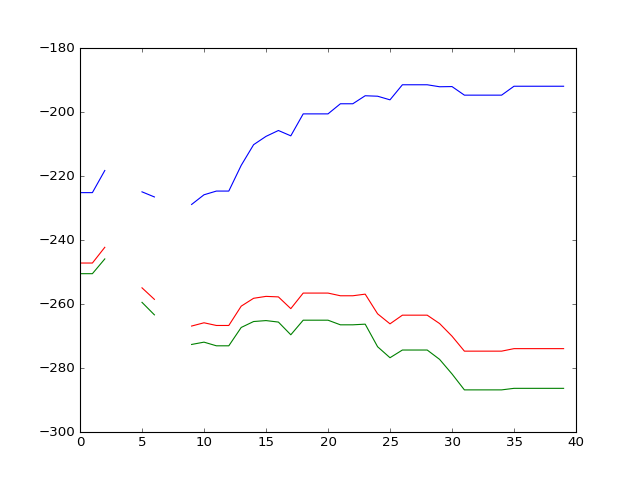

In [9]:
LLHs = []
BICs = []
AICs = []

%time
for graph in graphs:
    try:
        mle = pgm.graphical_gaussian_estimation(algo='scd',
                                                data=data,
                                                graph=graph)

        dist = mle.estimated.copy()

        LLHs.append(2 * dist.loglikelihood(data))
        
    except:
        LLHs.append(float("nan"))
    finally:
        
        BICs.append(LLHs[-1] - dist.nb_parameters * math.log(len(data.events)))
        AICs.append(LLHs[-1] - dist.nb_parameters * 2)

fig = pyplot.figure()
axes = fig.add_subplot(111)
axes.plot(LLHs)
axes.plot(BICs)
axes.plot(AICs)

In [10]:
aic = AICs.index(max(AICs))
bic = BICs.index(max(BICs))


<IPython.core.display.Javascript object>


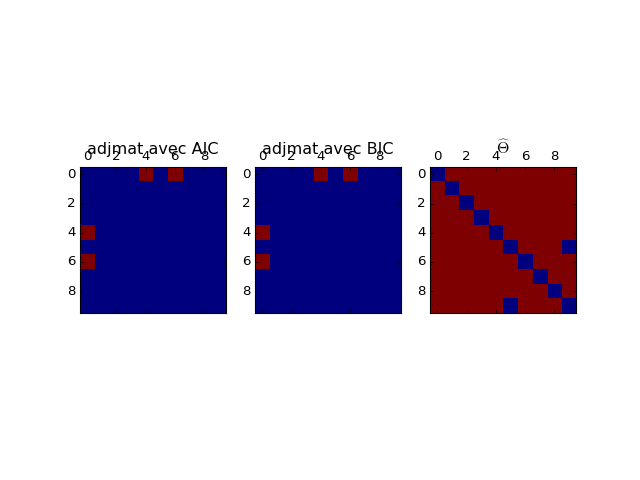

In [11]:
fig = pyplot.figure()
axes = graphs[aic].to_matrix().plot(axes = fig.add_subplot(131))
axes.set_title('adjmat avec AIC')
axes = graphs[bic].to_matrix().plot(axes = fig.add_subplot(132))
axes.set_title('adjmat avec BIC')
axes =  graph.to_matrix().plot(axes = fig.add_subplot(133))
axes.set_title('$ \widehat \Theta$')